****Gradient Boosting Model****

Columns: ['FAMD_1', 'FAMD_2', 'FAMD_3', 'FAMD_4', 'Y']
Shape: (25782, 5)
     FAMD_1    FAMD_2    FAMD_3    FAMD_4         Y
0  0.722159 -0.748604 -2.457741  2.843422  No_Displ
1 -0.131168  2.047659 -0.118618  2.159354  No_Displ
2  5.083731 -1.282638  0.935222 -0.645877  No_Displ
3 -0.687331  1.021406 -2.387299 -2.134329  No_Displ
4  1.634694  0.402081 -3.045378  2.658366  No_Displ
Classes: ['Displ' 'No_Displ']
Train size: (20625, 4)
Test size : (5157, 4)

=== Gradient Boosting Evaluation (FAMD) ===
Accuracy : 0.7204
Precision: 0.7252
Recall   : 0.7197
F1 Score : 0.7185

Classification Report:
              precision    recall  f1-score   support

       Displ       0.76      0.64      0.70      2557
    No_Displ       0.69      0.80      0.74      2600

    accuracy                           0.72      5157
   macro avg       0.73      0.72      0.72      5157
weighted avg       0.72      0.72      0.72      5157



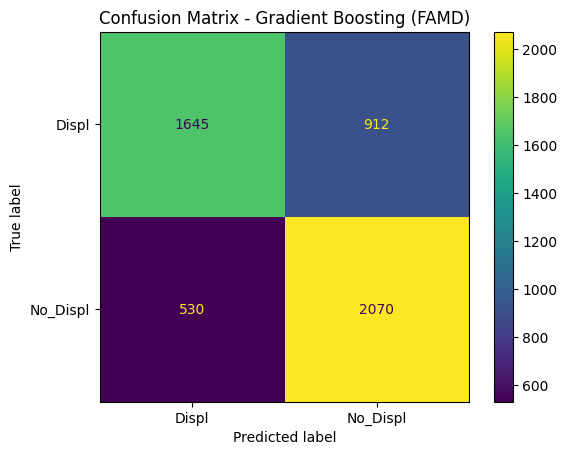


Top 10 Feature Importance:
  Feature  Importance
3  FAMD_4    0.361996
0  FAMD_1    0.270951
2  FAMD_3    0.188498
1  FAMD_2    0.178555


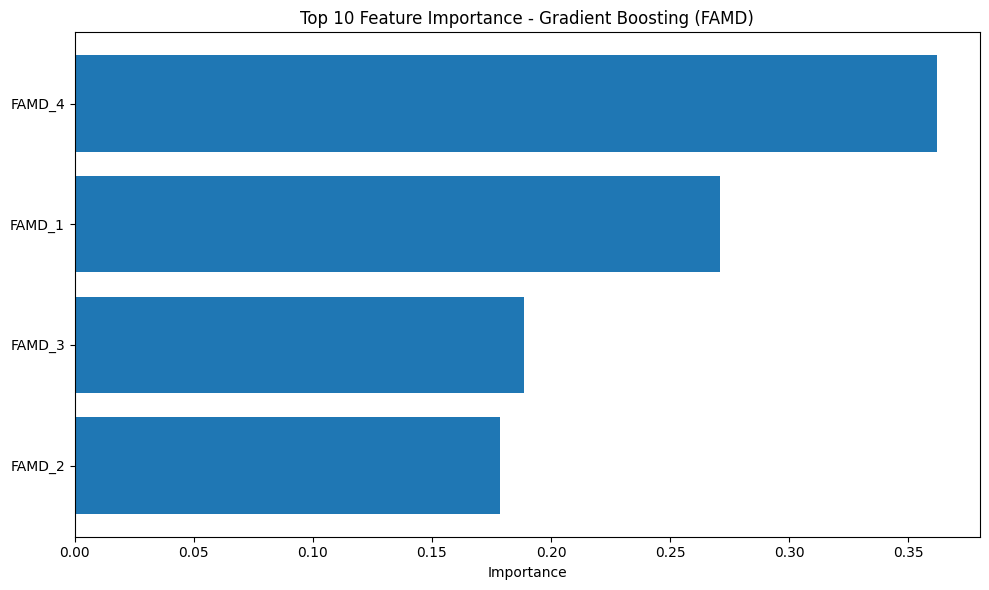

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# ==========================
# 1. Load dataset
# ==========================
data_famd = pd.read_csv("/kaggle/input/productdisplaypredistion/data_famd.csv", sep=';')

print("Columns:", data_famd.columns.tolist())
print("Shape:", data_famd.shape)
print(data_famd.head())

# ==========================
# 2. Features / Target
# ==========================
X = data_famd.drop('Y', axis=1).values
y = data_famd['Y']

# Encode target (No_Displ, Displ -> 0,1)
le = LabelEncoder()
y_enc = le.fit_transform(y)

print("Classes:", le.classes_)

# ==========================
# 3. Train / Test Split
# ==========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)

# ==========================
# 4. Gradient Boosting Model
# ==========================
gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)

# ==========================
# 5. Predictions
# ==========================
y_pred = gb.predict(X_test)

# ==========================
# 6. Evaluation
# ==========================
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\n=== Gradient Boosting Evaluation (FAMD) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# ==========================
# 7. Confusion Matrix
# ==========================
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=le.classes_)
plt.title("Confusion Matrix - Gradient Boosting (FAMD)")
plt.show()

# ==========================
# 8. Feature Importance
# ==========================
feat_imp = pd.DataFrame({
    "Feature": data_famd.drop('Y', axis=1).columns,
    "Importance": gb.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nTop 10 Feature Importance:")
print(feat_imp.head(10))

# ==========================
# 9. Plot Feature Importance
# ==========================
plt.figure(figsize=(10,6))
plt.barh(feat_imp["Feature"][:10], feat_imp["Importance"][:10])
plt.xlabel("Importance")
plt.title("Top 10 Feature Importance - Gradient Boosting (FAMD)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**Gaussian Naive Bayes**

Columns: ['FAMD_1', 'FAMD_2', 'FAMD_3', 'FAMD_4', 'Y']
Shape: (25782, 5)
=== Naive Bayes Evaluation - FAMD ===
Accuracy : 0.5844
Precision: 0.5845
Recall   : 0.5846
F1 Score : 0.5844

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.59      0.58      2515
           1       0.60      0.58      0.59      2642

    accuracy                           0.58      5157
   macro avg       0.58      0.58      0.58      5157
weighted avg       0.58      0.58      0.58      5157



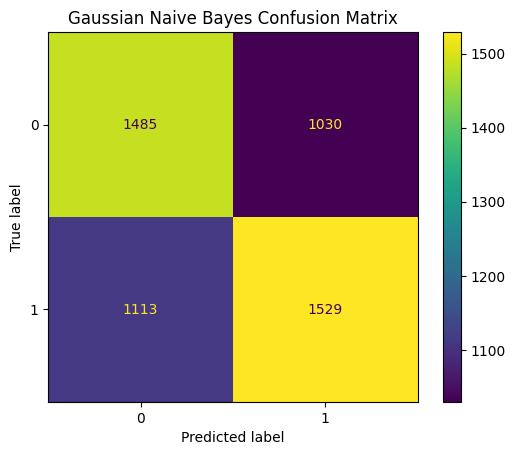

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --------------------------
# Load FAMD dataset
# --------------------------
data_famd = pd.read_csv("/kaggle/input/productdisplaypredistion/data_famd.csv", sep=';')
print("Columns:", data_famd.columns.tolist())
print("Shape:", data_famd.shape)

# Features / target
X = data_famd.drop('Y', axis=1)
y = data_famd['Y']

# Encode target
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42
)

# --------------------------
# Gaussian Naive Bayes
# --------------------------
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)

# --------------------------
# Evaluation
# --------------------------
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("=== Naive Bayes Evaluation - FAMD ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.show()


**Categorical Naive Bayes**

Columns: ['X1_cat', 'X2_cat', 'X3_cat', 'X4_cat', 'X6_cat', 'X5', 'X7', 'Y']
Shape: (25782, 8)
=== Naive Bayes Evaluation - Categorical ===
Accuracy : 0.7663
Precision: 0.7781
Recall   : 0.7637
F1 Score : 0.7625

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.66      0.73      2515
           1       0.73      0.87      0.79      2642

    accuracy                           0.77      5157
   macro avg       0.78      0.76      0.76      5157
weighted avg       0.78      0.77      0.76      5157



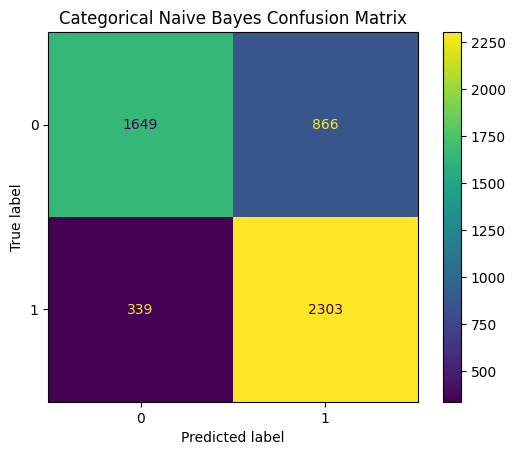

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --------------------------
# Load categorical dataset
# --------------------------
data_cat = pd.read_csv("/kaggle/input/productdisplaypredistion/data_categorical_mdlpc.csv", sep=';')
print("Columns:", data_cat.columns.tolist())
print("Shape:", data_cat.shape)

# Features / target
X = data_cat.drop('Y', axis=1)
y = data_cat['Y']

# Encode target
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Encode categorical features (label encoding each column)
X_enc = X.apply(LabelEncoder().fit_transform)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y_enc, test_size=0.2, random_state=42
)

# --------------------------
# Categorical Naive Bayes
# --------------------------
nb = CategoricalNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)

# --------------------------
# Evaluation
# --------------------------
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("=== Naive Bayes Evaluation - Categorical ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Categorical Naive Bayes Confusion Matrix")
plt.show()
